In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [ ]:
# Importing our dataset
data = pd.read_csv("./LogisticRegressionCaseStudy/Titanic-Dataset.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Apply info function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Apply describe function
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Health Checks

In [ ]:
# Proportion of null values in a column

data.isna().sum() / data.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
# Check for duplicates
data.duplicated().sum()

0

In [ ]:
# Fixing the missing values
data.Age.fillna(data.Age.mean(), inplace=True)
data.Age.fillna(data.Embarked.mode(), inplace=True)

## Univariate analysis

In [ ]:
def distribution_plot(data, feature, figsize=(8, 5), bins=10, kde=False):
    f2, ax_hist = plt.subplots(
        nrows=1,  # Number of rows of the subplot grid=1
        figsize=figsize,
    )  # creating the 2 subplots
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins)
    ax_hist.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

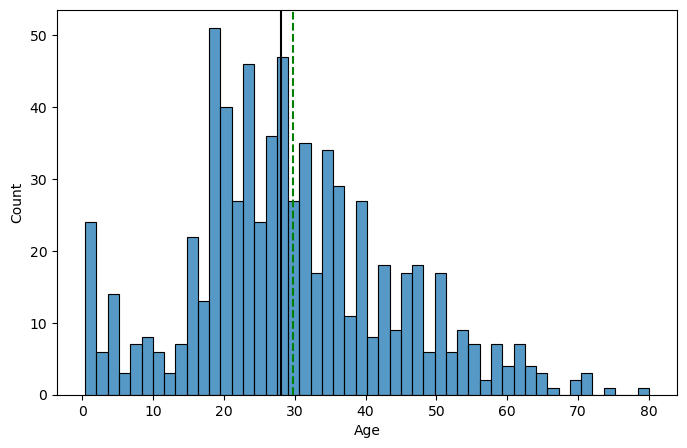

In [ ]:
distribution_plot(data, "Age", bins=50)

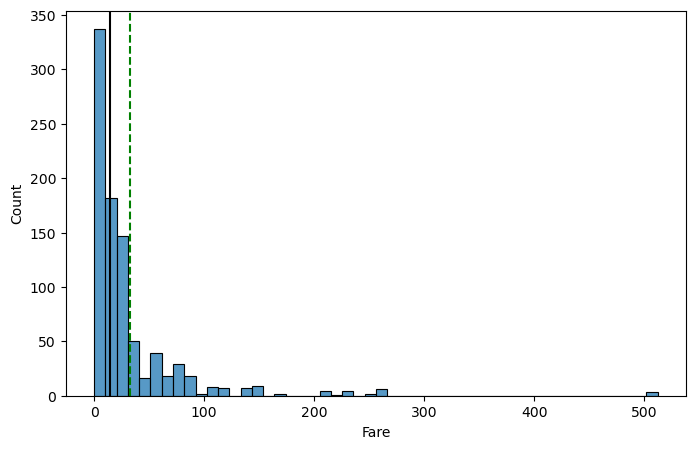

In [ ]:
distribution_plot(data, "Fare", bins=50)

In [ ]:
data['Survived'].value_counts(normalize=True).head()

0    0.616162
1    0.383838
Name: Survived, dtype: float64

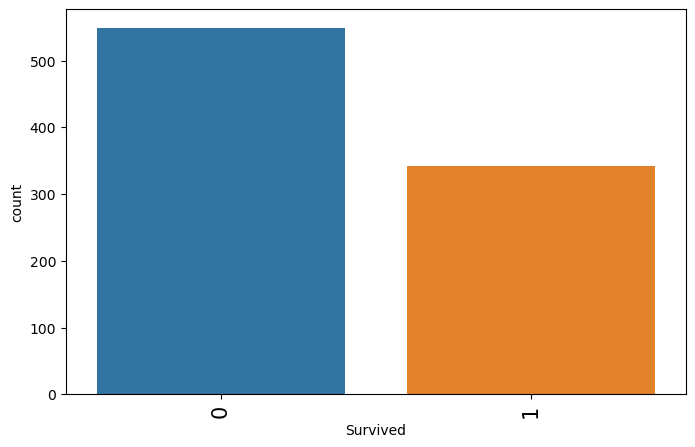

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['Survived'])
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [ ]:
data['Pclass'].value_counts(normalize=True).head()

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

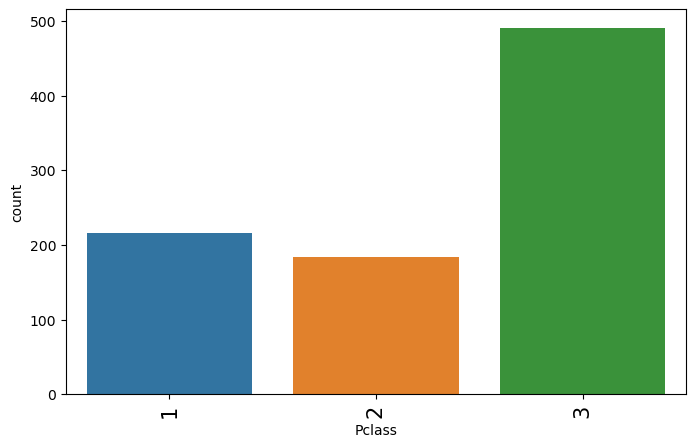

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['Pclass'])
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [ ]:
data['Sex'].value_counts(normalize=True).head()

male      0.647587
female    0.352413
Name: Sex, dtype: float64

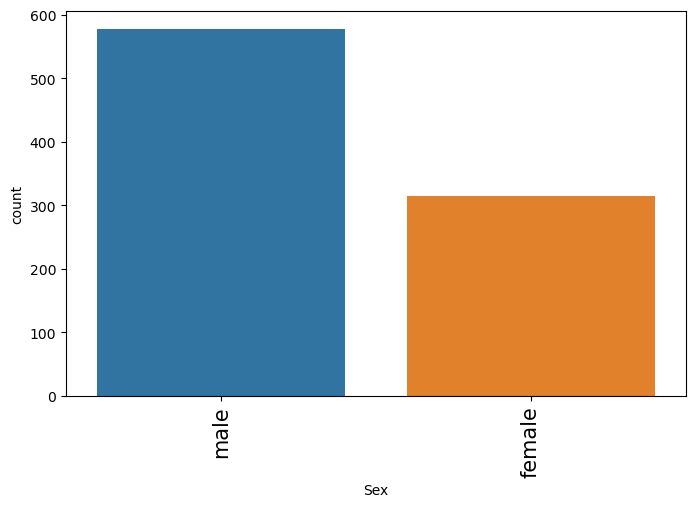

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['Sex'])
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [ ]:
data['SibSp'].value_counts(normalize=True).head()

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
Name: SibSp, dtype: float64

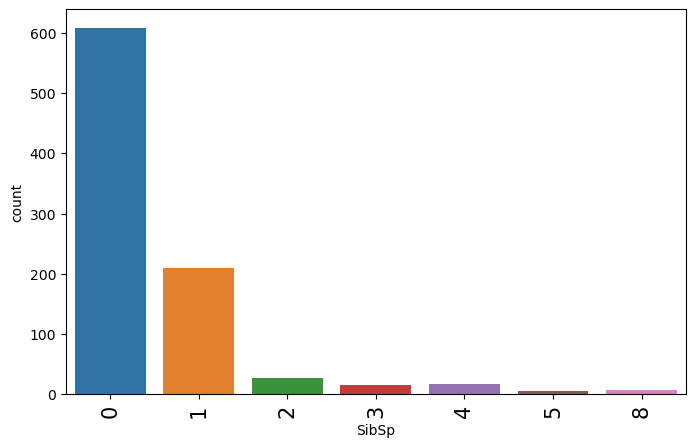

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['SibSp'])
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [ ]:
data['Parch'].value_counts(normalize=True).head()

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
Name: Parch, dtype: float64

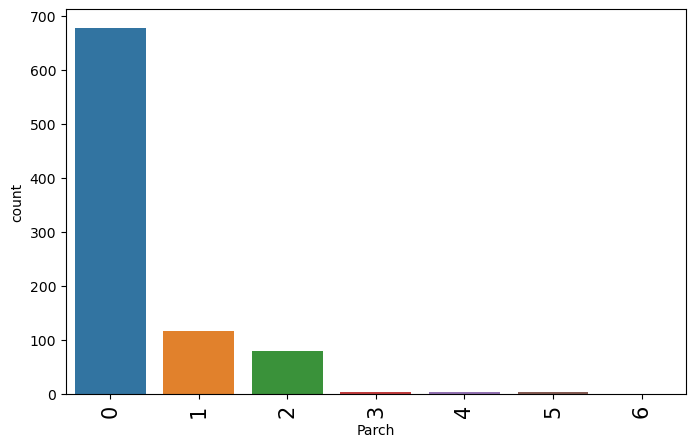

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['Parch'])
plt.xticks(rotation=90, fontsize=15)
plt.show()

In [ ]:
data['Embarked'].value_counts(normalize=True).head()

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

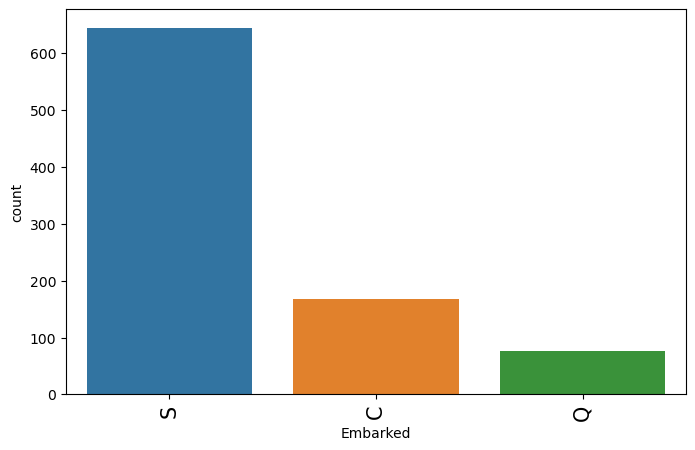

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x=data['Embarked'])
plt.xticks(rotation=90, fontsize=15)
plt.show()

## Bivariate Analysis

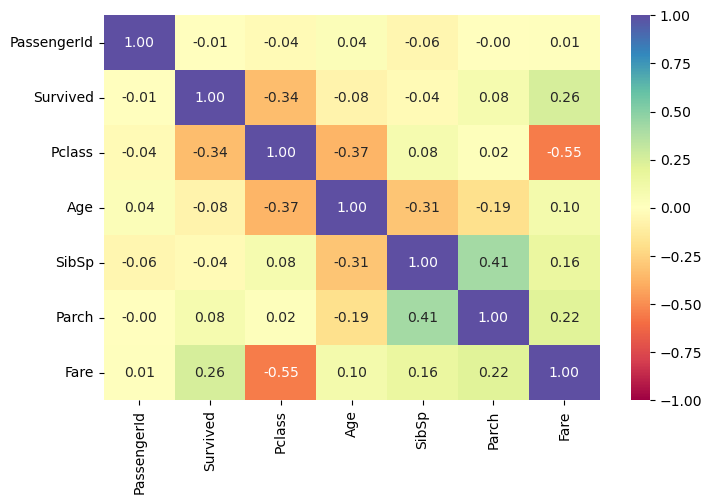

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

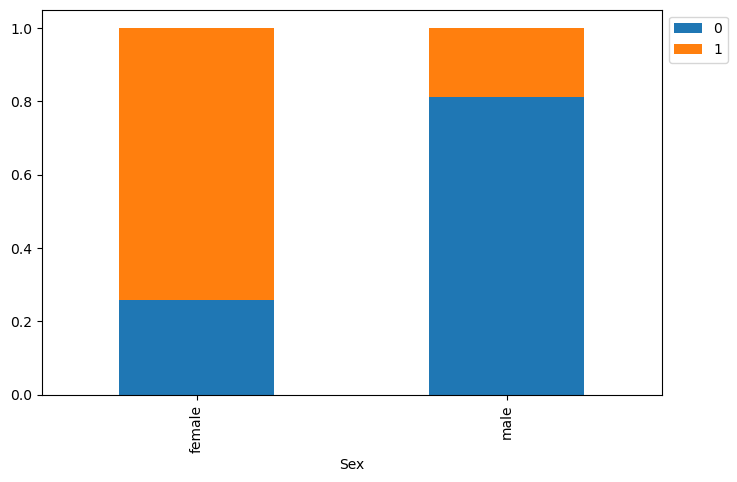

In [ ]:
# Define a 100% stacked bar chart
summ = pd.crosstab(data['Sex'], data['Survived'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

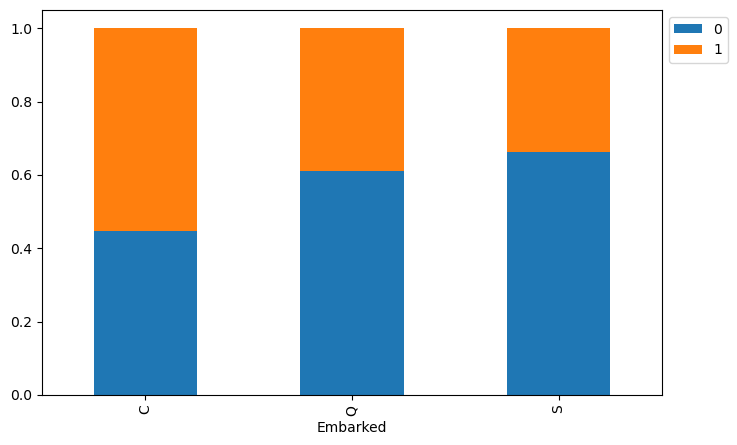

In [ ]:
# Define a 100% stacked bar chart
summ = pd.crosstab(data['Embarked'], data['Survived'], normalize='index')
summ.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

## Feature Engineering

In [ ]:
# Dropping unnecessary variables

data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Additional Exercise - Treat the outliers in fare

## Data preprocessing

In [ ]:
# Perform standardization
from sklearn.preprocessing import StandardScaler

numerical_columns = data.select_dtypes(include=['float64']).columns

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,-0.592481,1,0,-0.502445,S
1,1,1,female,0.638789,1,0,0.786845,C
2,1,3,female,-0.284663,0,0,-0.488854,S
3,1,1,female,0.407926,1,0,0.420730,S
4,0,3,male,0.407926,0,0,-0.486337,S


## Creation of dummy variables

In [ ]:
categorical_columns = data.select_dtypes(include=['category', 'object']).columns.tolist()
data=pd.get_dummies(data,columns=categorical_columns, drop_first=True)

data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,-0.592481,1,0,-0.502445,1,0,1
1,1,1,0.638789,1,0,0.786845,0,0,0
2,1,3,-0.284663,0,0,-0.488854,0,0,1
3,1,1,0.407926,1,0,0.420730,0,0,1
4,0,3,0.407926,0,0,-0.486337,1,0,1


# Fitting and Validation

    -> Which metrics should be targeted in the survival analysis and why?
    1. Accuracy
    2. Precision
    3. Recall
    4. f1 score

    Correct answer:- Recall as we are more interested in getting as many people live out of the boat as much possible. Therefore we are interested in identifying who has the higher probability of survival?

## Train test split

In [ ]:
# specifying the independent and dependent set of variables
X = data.drop(["Survived"], axis=1)
Y = data["Survived"]

# splitting data in train and test sets
# A good rule of thumb is 70% data in train set and 30% data in test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.40, random_state=20
)

In [ ]:
# Analyze the output from train and test data
print(f"Shape of Training set : {X_train.shape}")
print(f"Shape of test set : {X_test.shape}")

print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))

print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set : (534, 8)
Shape of test set : (357, 8)
Percentage of classes in training set:
0    0.606742
1    0.393258
Name: Survived, dtype: float64
Percentage of classes in test set:
0    0.630252
1    0.369748
Name: Survived, dtype: float64


In [ ]:
# adding a constant to the independent variables since logit model doesn't directly add the constant value.
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [ ]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train)
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  534
Model:                          Logit   Df Residuals:                      525
Method:                           MLE   Df Model:                            8
Date:                Tue, 22 Aug 2023   Pseudo R-squ.:                  0.3412
Time:                        01:16:02   Log-Likelihood:                -235.75
converged:                       True   LL-Null:                       -357.88
Covariance Type:            nonrobust   LLR p-value:                 2.849e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0423      0.527      7.678      0.000       3.010       5.074
Pclass        -1.0482      0.190     -5.506      0.000      -1.421      -0.675
Age           -0.4907      0.127     -3.869      0.0

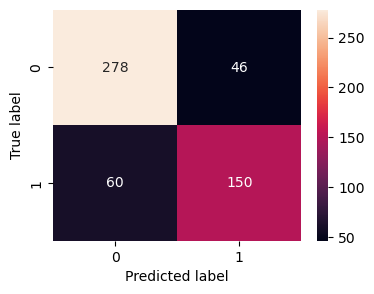

In [ ]:
# Apply a confusion Matrix and derive the precision, recall and f1 score

cm = confusion_matrix(y_train, round(lg.predict(X_train)))
labels = np.asarray(
        [
            ["{0:0.0f}".format(item)]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [ ]:
recall = recall_score(y_train, round(lg.predict(X_train)))  # to compute Recall
precision = precision_score(y_train, round(lg.predict(X_train)))  # to compute Precision
f1 = f1_score(y_train, round(lg.predict(X_train)))  # to compute F1-score

print(f'precision: {precision}, recall: {recall}, f1 score: {f1}')

precision: 0.7653061224489796, recall: 0.7142857142857143, f1 score: 0.7389162561576355


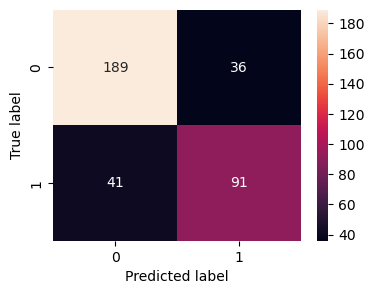

In [ ]:
# Checking model performance on test set

cm = confusion_matrix(y_test, round(lg.predict(X_test)))
labels = np.asarray(
        [
            ["{0:0.0f}".format(item)]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=labels, fmt="")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [ ]:
recall = recall_score(y_test, round(lg.predict(X_test)))  # to compute Recall
precision = precision_score(y_test, round(lg.predict(X_test)))  # to compute Precision
f1 = f1_score(y_test, round(lg.predict(X_test)))  # to compute F1-score

print(f'precision: {precision}, recall: {recall}, f1 score: {f1}')

precision: 0.7165354330708661, recall: 0.6893939393939394, f1 score: 0.7027027027027026


## Model improvement

In [ ]:
# Apply VIF for multicollinearity

In [ ]:
# Perform feature reduction using p-values in logit model
columns = X_train.columns.tolist() # preliminary column list

max_p = 1 # setting a max p-value

while len(columns) > 0:

    X_train_temp = X_train[columns] # defining the train set


    model = sm.Logit(y_train, X_train_temp).fit(disp=False) # fitting the model

    p_vals = model.pvalues # getting the p-values
    max_p = max(p_vals)    # getting the maximum p-value

    feature_with_p_max = p_vals.idxmax() # variable with maximum p-value

    if max_p > 0.05:
        columns.remove(feature_with_p_max) # remove the feature with max p value
    else:
        break

selected_features = columns
print(selected_features)